<a href="https://colab.research.google.com/github/its-Nhi-Ho/DS102__P.21/blob/master/BTTH4_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def k_means(data, k , max_iters = 100):
  centroids = data[np.random.choice(data.shape[0], k , replace = False)]

  for _ in range(max_iters):
    distances = np.array([np.sum((data - centroid) ** 2, axis = 1) for centroid in centroids])
    labels = np.argmin(distances, axis = 0)

    # Phân cụm các điểm dữ liệu rồi tính trung bình các điểm đó để ra new_centroiss
    new_centroids = np.array([data[labels == i].mean(axis = 0) for i in range(k)])

    if np.all(centroids == new_centroids):
      break
    centroids = new_centroids
  return labels, centroids

##Assignment 1 (4 scores):##

In [ ]:
mean_1 = [2,2]
mean_2 = [8,3]
mean_3 = [3,6]
cov_1 = [[1,0], [0,1]]

data_1 = np.random.multivariate_normal(mean_1,cov_1,200)
data_2 = np.random.multivariate_normal(mean_2,cov_1,200)
data_3 = np.random.multivariate_normal(mean_3,cov_1,200)

dataset_1 = np.vstack((data_1,data_2,data_3))

In [ ]:
k = 3
labels_1, centroids_1 = k_means(dataset_1,k,max_iters = 100)

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(dataset1, labels_1, centroids):
    plt.scatter(dataset1[:, 0], dataset1[:, 1], c=labels_1, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
    plt.title('Kết quả:')
    plt.xlabel('Trục X')
    plt.ylabel('Trục Y')
    plt.legend()
    plt.show()

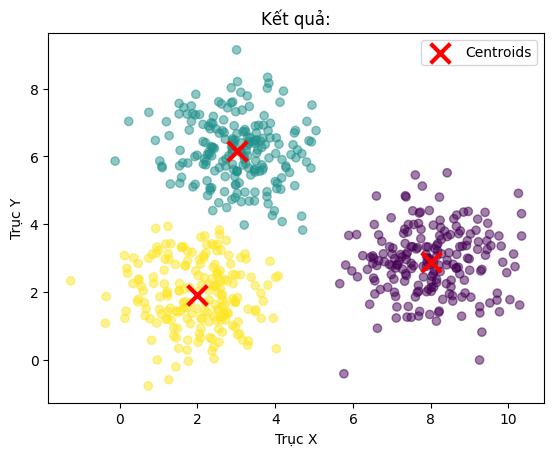

In [ ]:
plot_clusters(dataset_1, labels_1, centroids_1)

###Tác động của việc khởi tạo tâm cụm ngẫu nhiên đến hiệu suất tổng thể của K-means ###

* Trong hình,các cụm được phân chia tương đối rõ ràng với ba tâm cụm (centroids) nằm gần trung tâm của từng nhóm điểm dữ liệu
* Tuy nhiên, việc khởi tạo tâm cụm ngẫu nhiên có thể ảnh hưởng đáng kể đến hiệu suất của K-means. Nếu tâm cụm khởi tạo ngẫu nhiên rơi vào khu vực quá gần nhau hoặc nằm ngoài các cụm chính, thuật toán có thể hội tụ đến một nghiệm cục bộ không tối ưu, dẫn đến phân cụm sai lệch.



##Assignment 2:##

In [ ]:
data_4 = np.random.multivariate_normal(mean_1,cov_1,50)
data_5 = np.random.multivariate_normal(mean_2,cov_1,20)
data_6 = np.random.multivariate_normal(mean_3,cov_1,1000)

dataset_2 = np.vstack((data_4,data_5,data_6))

In [ ]:
labels_2, centroids_2 = k_means(dataset_2,k,max_iters = 100)

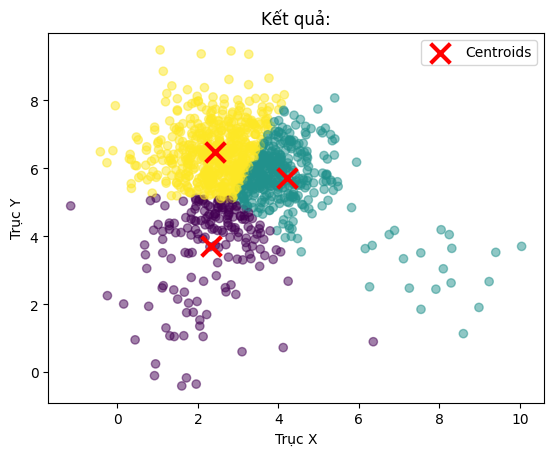

In [ ]:
plot_clusters(dataset_2, labels_2, centroids_2)

In [ ]:
### Tác động của kích thước khác nhau giữa các cụm đến hiệu suất của K-means ###

* Các cụm có kích thước khác nhau rõ rệt, với *cụm màu vàng* có số lượng điểm lớn hơn cụm *màu xanh lá* và *tím*
* K-means nhạy cảm với sự mất cân bằng về kích thước cụm, vì thuật toán này chỉ phân chia dữ liệu sao cho tổng khoảng cách từ điểm đến tâm cụm là nhỏ nhất, mà không quan tâm đến số lượng điểm trong mỗi cụm. Dẫn đến việc *cụm lớn (vàng)* có thể **"lấn át"** các cụm nhỏ hơn, làm sai lệch vị trí tâm cụm hoặc khiến các cụm nhỏ bị phân chia không chính xác.




Assignment 3:

In [ ]:
cov_2 = [[10,0], [0,1]]
data_7 = np.random.multivariate_normal(mean_1,cov_1,200)
data_8 = np.random.multivariate_normal(mean_2,cov_1,200)
data_9 = np.random.multivariate_normal(mean_3,cov_2,200)

dataset_3 = np.vstack((data_7,data_8,data_9))

In [ ]:
labels_3, centroids_3 = k_means(dataset_3,k,max_iters = 100)

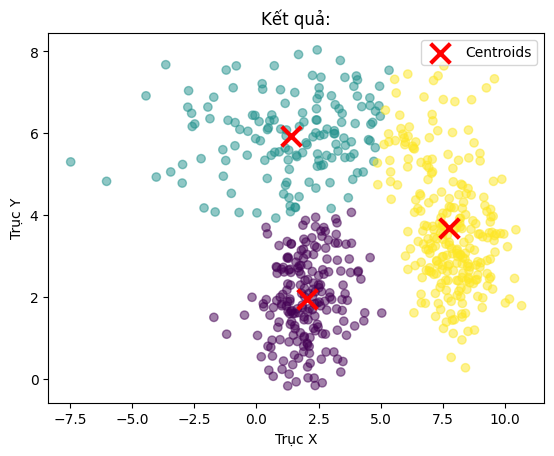

In [ ]:
plot_clusters(dataset_3, labels_3, centroids_3)

### Tác động của phân phối Gaussian (3, 6), cov_2 đến hiệu suất của K-means ###

*  Phân phối Gaussian với mean (3, 6) và ma trận hiệp phương sai cov_2 = [[10, 0], [0, 1]] tạo ra một cụm có phương sai lớn hơn nhiều trên trục X (10) so với trục Y (1). Điều này có nghĩa là cụm (màu xanh, gần mean [3, 6]) sẽ trải rộng hơn theo chiều ngang (trục X) và hẹp hơn theo chiều dọc (trục Y), tạo hình dạng elip dẹt theo hướng ngang.
*  K-means giả định các cụm có hình dạng hình cầu và phương sai đồng nhất giữa các chiều. Tuy nhiên, cụm màu xanh có hình dạng elip dẹt (do phương sai trên trục X lớn hơn nhiều), điều này làm K-means gặp khó khăn trong việc phân cụm chính xác. Trong hình, tâm cụm (dấu X đỏ) của cụm xanh không nằm ở vị trí tối ưu, và một phần điểm của cụm xanh có thể bị gán nhầm vào cụm màu vàng hoặc tím do sự chồng lấn và hình dạng không đối xứng.
*   Hiệu suất của K-means giảm vì thuật toán không thể xử lý tốt các cụm có hình dạng elip hoặc phương sai khác nhau giữa các chiều.
